In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
from grid_utils import *
from pedestrian_utils import *
from pedestrian import *
from simulation import *
from results_utils import *
from visualization import *

In [2]:
output_dir = r"C:\Users\doohu\Desktop\대학원\디트\1209_디트시뮬레이션_격자"

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 경로 설정
area_shp_path = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\신규대상지_도보이동가능지역.shp"
buildings_shp_path = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\신규대상지_건물지역_대피소제외.shp"
special_area_shp_path = r"C:\Users\doohu\Desktop\대학원\디트\디트파이썬코드\시장영역.shp"
evacuation_target_area_shp_path = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\대피대상지_shp_point아님.shp"
creation_area_path = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\agent_초기위치형성용.shp"

# GeoDataFrame 불러오기 및 좌표계 변환
target_crs = "EPSG:5181"
area_gdf = gpd.read_file(area_shp_path).to_crs(target_crs)
buildings_gdf = gpd.read_file(buildings_shp_path).to_crs(target_crs)
special_area_gdf = gpd.read_file(special_area_shp_path).to_crs(target_crs)
evacuation_target_area_gdf = gpd.read_file(evacuation_target_area_shp_path).to_crs(target_crs)
creation_area_gdf = gpd.read_file(creation_area_path).to_crs(target_crs)

print("Reprojection complete. All data is now in EPSG:5181.")

Reprojection complete. All data is now in EPSG:5181.


In [4]:
grid = np.load(os.path.join(output_dir, "grid.npy"))
x_coords = np.loadtxt(os.path.join(output_dir, "x_coords.csv"), delimiter=",")
y_coords = np.loadtxt(os.path.join(output_dir, "y_coords.csv"), delimiter=",")
# GeoDataFrame 불러오기 및 좌표계 변환
special_area_shp_path = r"C:\Users\doohu\Desktop\대학원\디트\디트파이썬코드\시장영역.shp"
creation_area_path = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\agent_초기위치형성용.shp"
special_area_gdf = gpd.read_file(special_area_shp_path).to_crs("EPSG:5181")
creation_area_gdf = gpd.read_file(creation_area_path).to_crs("EPSG:5181")

In [5]:
import pickle
import os
def load_area_cells():
    if os.path.exists(cache_file):
        with open(cache_file, "rb") as f:
            cached_data = pickle.load(f)
            
            creation_area_cells = cached_data["creation_area_cells"]
            special_area_cells = cached_data["special_area_cells"]
            evacuation_target_area_cells = cached_data["evacuation_target_area_cells"]
            general_area_cells = creation_area_cells  # general_area_cells는 creation_area_cells와 동일
            
            print("Data successfully loaded.")
            
            return creation_area_cells, special_area_cells, evacuation_target_area_cells, general_area_cells
    else:
        print("Cache file not found. Please generate and save the data first.")
        return None, None, None, None
cache_file = r"C:\Users\doohu\Desktop\대학원\디트\1106_디트_최종대상지_4326\area_cells_cache.pkl"
creation_area_cells, special_area_cells, evacuation_target_area_cells, general_area_cells = load_area_cells()

Data successfully loaded.


In [6]:
# 보행자 생성 파라미터 설정
total_agents = 100
special_area_ratio = 0.3
agent_type_ratios = {'노인/어린이': 0.2, '중장년': 0.4, '청소년/청년': 0.3, '장애인': 0.1}
agent_types = {'노인/어린이': 1.0, '중장년': 1.3, '청소년/청년': 1.9, '장애인': 0.71}
behaviors = {'knows_specific': 0.3, 'knows_all': 0.4, 'exploratory': 0.3}
# 보행자 생성
pedestrians = generate_pedestrians(
    total_agents, agent_type_ratios, agent_types, behaviors, 
    special_area_cells, general_area_cells, evacuation_target_area_cells, 
    x_coords, y_coords, special_area_ratio
)

# 생성된 보행자 수 확인
print(f"Total pedestrians generated: {len(pedestrians)}")

Total pedestrians generated: 100


C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:76: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.scatter(x_coords[j], y_coords[i], color='orange', s=50, marker='x', label='Evacuation Target' if 'Evacuation Target' not in ax.get_legend_handles_labels()[1] else "")


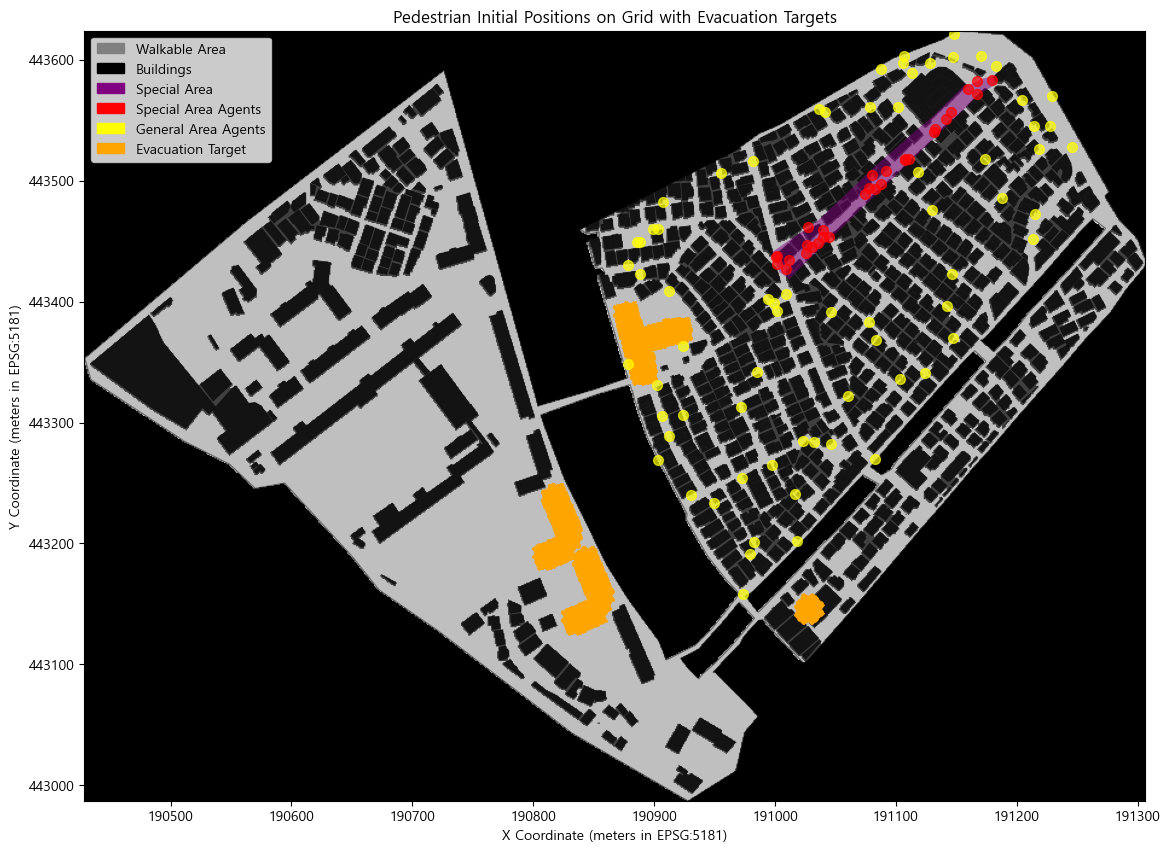

In [7]:
visualize_pedestrian_positions(
    grid, x_coords, y_coords, pedestrians, 
    special_area_gdf, area_gdf, buildings_gdf, evacuation_target_area_cells
)

In [8]:
import numpy as np
from simulation import *
from results_utils import *
from visualization import *
from pedestrian_utils import *


--- Step 1 ---
Pedestrian 26 knows target (205, 391) now.
Pedestrian 27 knows target (396, 496) now.
Pedestrian 52 knows target (171, 429) now.
Pedestrian 61 knows target (171, 429) now.
Pedestrian 67 knows target (388, 495) now.
Pedestrian 68 knows target (396, 496) now.
Pedestrian 75 knows target (396, 496) now.
Pedestrian 79 knows target (168, 599) now.
Pedestrian 82 knows target (409, 451) now.
Pedestrian 95 knows target (150, 400) now.

--- Step 2 ---
Pedestrian 0 knows target (396, 496) now.
Pedestrian 50 knows target (396, 496) now.
Pedestrian 60 knows target (396, 496) now.
Pedestrian 93 knows target (350, 467) now.

--- Step 3 ---
Pedestrian 80 knows target (394, 497) now.
Pedestrian 89 knows target (387, 455) now.

--- Step 4 ---
Pedestrian 13 reached the goal at (361, 454).

--- Step 5 ---

--- Step 6 ---

--- Step 7 ---

--- Step 8 ---

--- Step 9 ---

--- Step 10 ---
Pedestrian 4 reached the goal at (383, 492).

--- Step 11 ---

--- Step 12 ---

--- Step 13 ---

--- Step 

C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\simulation.py:44: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.scatter(x_coords[j], y_coords[i], color='orange', s=50, marker='x', label='Evacuation Target' if 'Evacuation Target' not in ax.get_legend_handles_labels()[1] else "")
C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\simulation.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.scatter(ped_x, ped_y, color='red', s=10, marker='.', label='Pedestrian' if 'Pedestrian' not in ax.get_legend_handles_labels()[1] else "")


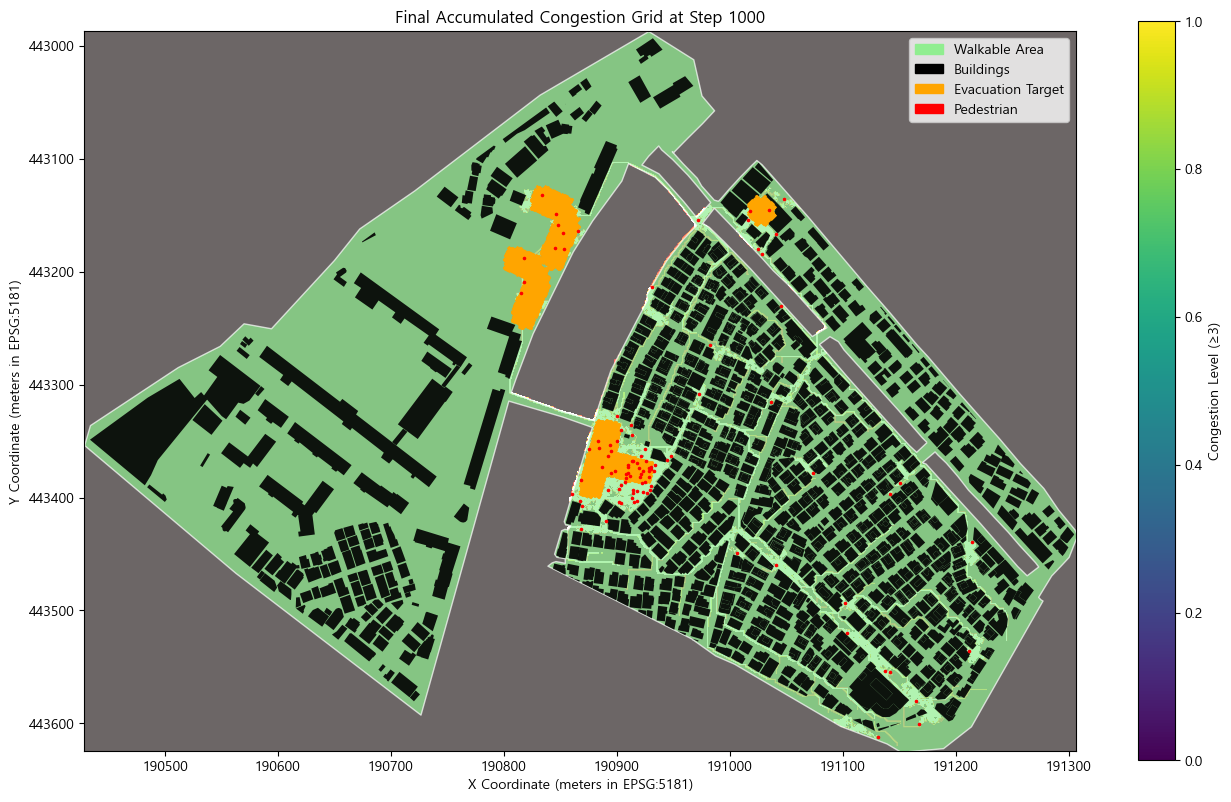

In [9]:
dynamic_congestion_grid, accumulated_congestion_grid, evacuation_details, congestion_timestamps= run_simulation(grid, pedestrians, evacuation_target_area_cells, x_coords, y_coords, area_gdf, buildings_gdf, steps=1000)

C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:159: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.scatter(x_coords[j], y_coords[i], color='orange', s=50, marker='x', label='Evacuation Target' if 'Evacuation Target' not in ax.get_legend_handles_labels()[1] else "")
C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:178: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.plot(path_x, path_y, color=type_color, linewidth=1, label=f'{pedestrian.type}' if f'{pedestrian.type}' not in ax.get_legend_handles_labels()[1] else "")
C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:181: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/st

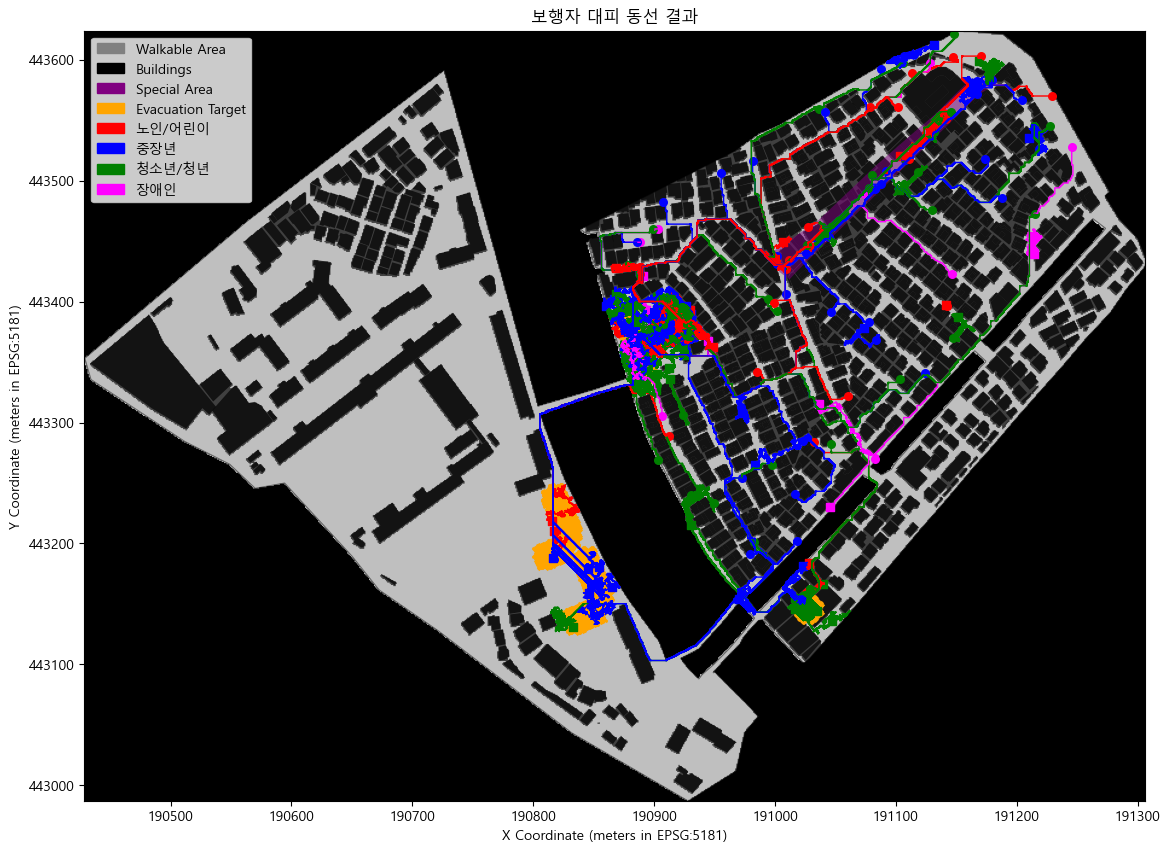

In [10]:
visualize_by_types_evacuations(grid, x_coords, y_coords, pedestrians, special_area_gdf, area_gdf, buildings_gdf, evacuation_target_area_cells)

C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:237: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.scatter(x_coords[j], y_coords[i], color='orange', s=50, marker='x', label='Evacuation Target' if 'Evacuation Target' not in ax.get_legend_handles_labels()[1] else "")
C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:253: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.plot(path_x, path_y, color=behavior_color, linewidth=1, label=f'{pedestrian.behavior}' if f'{pedestrian.behavior}' not in ax.get_legend_handles_labels()[1] else "")
C:\Users\doohu\Desktop\대학원\디트\시뮬레이션리팩토링\visualization.py:256: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matpl

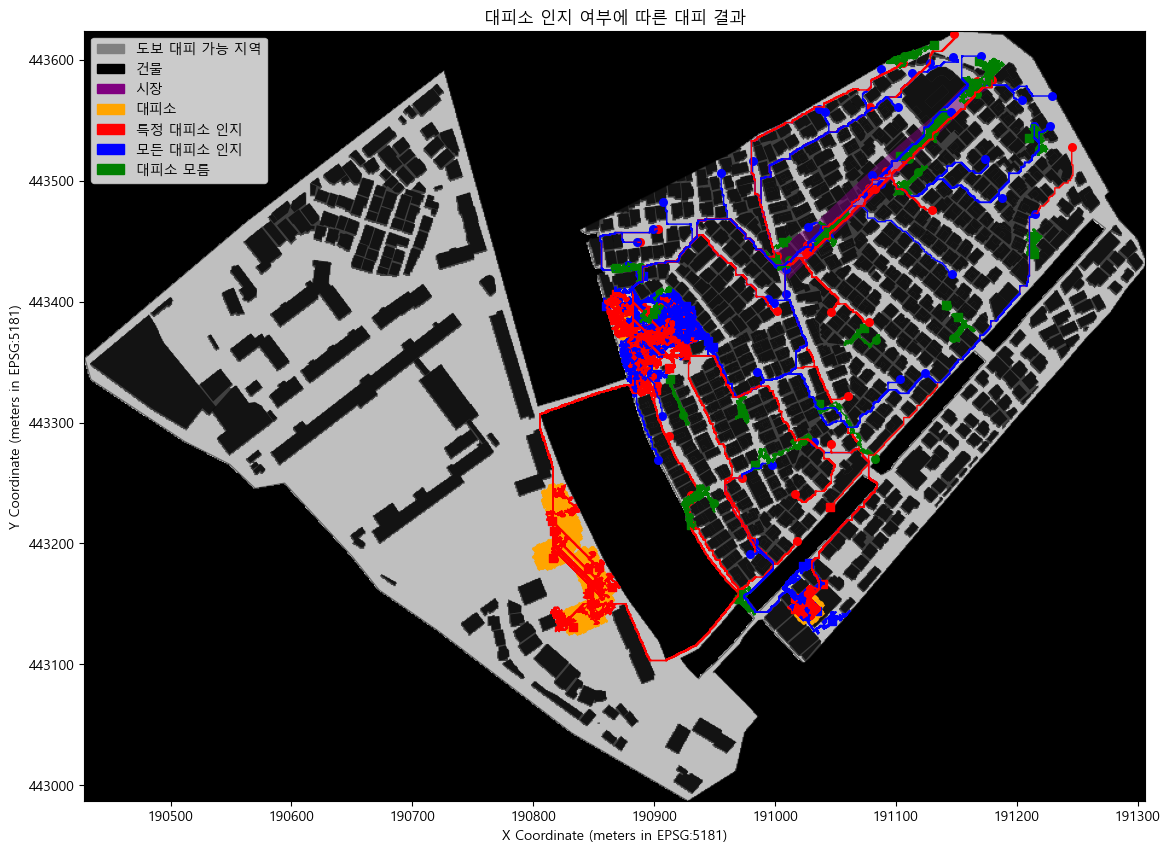

In [11]:
visualize_evacuations_by_behavior(grid, x_coords, y_coords, pedestrians, special_area_gdf, area_gdf, buildings_gdf, evacuation_target_area_cells)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_congestion_with_context(grid, x_coords, y_coords, congestion_grid, area_gdf, buildings_gdf, evacuation_target_cells, step, title="Congestion Grid"):
    """
    혼잡도 그리드를 건물 및 도보 이동 가능 지역과 함께 시각화합니다.

    Parameters:
        grid (numpy.ndarray): 격자 데이터
        x_coords (numpy.ndarray): X 좌표 배열
        y_coords (numpy.ndarray): Y 좌표 배열
        congestion_grid (numpy.ndarray): 혼잡도 그리드
        area_gdf (GeoDataFrame): 이동 가능한 전체 영역 GeoDataFrame
        buildings_gdf (GeoDataFrame): 건물 GeoDataFrame
        evacuation_target_cells (list of tuples): 대피 목표 셀의 인덱스 리스트
        step (int): 현재 스텝
        title (str): 그래프 제목
    """

    plt.figure(figsize=(12, 10))

    # 도보 이동 가능 지역 시각화
    area_gdf.plot(ax=plt.gca(), color='gray', edgecolor='black', alpha=0.5, label='Walkable Area')

    # 건물 시각화
    buildings_gdf.plot(ax=plt.gca(), color='black', alpha=0.7, label='Buildings')

    # 혼잡도 히트맵 시각화 (origin='lower'로 격자가 뒤집히지 않도록 설정)
    plt.imshow(congestion_grid, cmap='hot', origin='lower',
               extent=[x_coords[0], x_coords[-1], y_coords[0], y_coords[-1]], alpha=0.7)

    # 대피 목표 셀 시각화 (주황색 'X' 마커)
    for i, j in evacuation_target_cells:
        plt.scatter(x_coords[j], y_coords[i], color='orange', s=50, label='Evacuation Target' if 'Evacuation Target' not in plt.gca().get_legend_handles_labels()[1] else "")

    # 컬러바 설정
    plt.colorbar(label='Congestion Level')

    # 그래프 제목 및 라벨 설정
    plt.title(f"{title} at Step {step}")
    plt.xlabel("X Coordinate (meters in EPSG:5181)")
    plt.ylabel("Y Coordinate (meters in EPSG:5181)")

    # 범례 추가
    legend_handles = [
        mpatches.Patch(color='lightgreen', label='Walkable Area'),
        mpatches.Patch(color='black', label='Buildings'),
        mpatches.Patch(color='orange', label='Evacuation Target')
    ]
    plt.legend(handles=legend_handles)

    plt.show()

C:\Users\doohu\AppData\Local\Temp\ipykernel_28448\2429566695.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.scatter(x_coords[j], y_coords[i], color='orange', s=50, label='Evacuation Target' if 'Evacuation Target' not in plt.gca().get_legend_handles_labels()[1] else "")


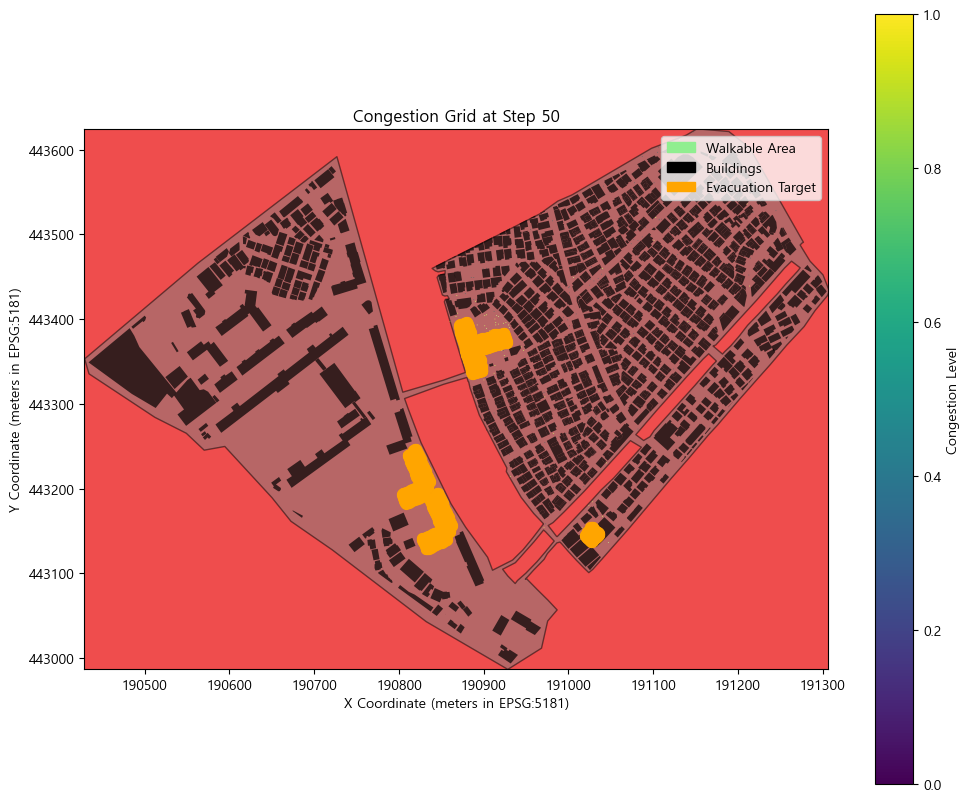

In [34]:
plot_congestion_with_context(grid, x_coords, y_coords, dynamic_congestion_grid, area_gdf, buildings_gdf, evacuation_target_area_cells, 50, title="Congestion Grid")

In [23]:
import numpy as np

# 혼잡도 그리드의 최소 및 최대 값 확인
min_congestion = np.min(dynamic_congestion_grid)
max_congestion = np.max(dynamic_congestion_grid)

print(f"최소 혼잡도: {min_congestion}")
print(f"최대 혼잡도: {max_congestion}")


최소 혼잡도: -1
최대 혼잡도: 2


In [24]:
import numpy as np

# 혼잡도 그리드의 최소 및 최대 값 확인
min_congestion = np.min(accumulated_congestion_grid)
max_congestion = np.max(accumulated_congestion_grid)

print(f"최소 혼잡도: {min_congestion}")
print(f"최대 혼잡도: {max_congestion}")

최소 혼잡도: -999
최대 혼잡도: 589


In [22]:
def display_pedestrian_info(pedestrian):
    print(f"ID: {pedestrian.id}")
    print(f"Position: {pedestrian.position}")
    print(f"Speed: {pedestrian.speed}")
    print(f"Behavior: {pedestrian.behavior}")
    print(f"Type: {pedestrian.type}")
    print(f"Special Area: {pedestrian.special_area}")
    print(f"Knows Target: {pedestrian.knows_target}")
    print(f"Goal: {pedestrian.goal}")
    print(f"Goal Reached: {pedestrian.goal_reached}")
    print(f"Path: {pedestrian.path}")
    print(f"Path2: {pedestrian.real_path}")
    if hasattr(pedestrian, 'total_distance'):
        print(f"Total Distance: {pedestrian.total_distance}")
    else:
        print("Total Distance: Not Available")

# 0번째 에이전트 정보 확인
display_pedestrian_info(pedestrians[1])

ID: 1
Position: (406, 486)
Speed: 1.3
Behavior: knows_all
Type: 중장년
Special Area: True
Knows Target: True
Goal: (396, 496)
Goal Reached: True
Path: [(407, 487), (406, 486)]
Path2: [(530, 679), (530, 678), (530, 679), (530, 677), (530, 678), (530, 676), (530, 677), (530, 675), (530, 676), (530, 674), (530, 675), (530, 673), (530, 674), (530, 672), (530, 673), (529, 672), (530, 672), (529, 671), (529, 672), (529, 670), (529, 671), (529, 669), (529, 670), (529, 668), (529, 669), (528, 668), (529, 668), (527, 668), (528, 668), (526, 668), (527, 668), (525, 668), (526, 668), (525, 667), (525, 668), (524, 667), (525, 667), (524, 666), (524, 667), (523, 666), (524, 666), (523, 665), (523, 666), (522, 665), (523, 665), (522, 664), (522, 665), (521, 664), (522, 664), (521, 663), (521, 664), (520, 663), (521, 663), (520, 662), (520, 663), (519, 662), (520, 662), (519, 661), (519, 662), (518, 661), (519, 661), (518, 660), (518, 661), (517, 660), (518, 660), (517, 659), (517, 660), (516, 659), (51

In [31]:
import pandas as pd

def save_evacuations_to_excel(pedestrians, filename="evacuation_results.xlsx"):
    """
    보행자 시뮬레이션 결과를 Excel 파일로 저장하며, 세 가지 시트를 포함합니다.

    Parameters:
        pedestrians (list): 보행자 객체 리스트
        filename (str): 저장할 Excel 파일 이름
    """
    # 결과를 저장할 데이터 리스트
    results = []

    for pedestrian in pedestrians:
        # 소요 시간 계산 (이동 거리 / 속도)
        if pedestrian.speed > 0:
            escape_time = round(pedestrian.total_distance / pedestrian.speed, 2)
        else:
            escape_time = None

        # 보행자 결과 데이터 생성
        result = {
            "ID": pedestrian.id,
            "현재 위치": pedestrian.position,
            "속도": pedestrian.speed,
            "행동 유형": pedestrian.behavior,
            "보행자 타입": pedestrian.type,
            "시장 지역 시작 여부": pedestrian.special_area,
            "대피소 인지 여부": pedestrian.knows_target,
            "대피 목표": pedestrian.goal,
            "대피 성공 여부": pedestrian.goal_reached,
            "실제 경로": pedestrian.real_path,
            "총 이동 거리(미터)": pedestrian.total_distance,
            "소요 시간(초)": escape_time
        }

        results.append(result)

    # DataFrame 생성
    df = pd.DataFrame(results)

    # Sheet 1: 각 보행자별 상세 결과
    sheet1 = df

    # Sheet 2: 행동 유형별 통계
    behavior_stats = df.groupby("행동 유형").agg(
        총_보행자수=("ID", "count"),
        대피_성공자수=("대피 성공 여부", lambda x: x.sum()),
        대피_성공률_퍼센트=("대피 성공 여부", lambda x: round(x.mean() * 100, 2)),
        대피소_인지_보행자수=("대피소 인지 여부", lambda x: x.sum()),
        평균_소요시간_성공=("소요 시간(초)", lambda x: x[df["대피 성공 여부"]].mean()),
        평균_이동거리_성공=("총 이동 거리(미터)", lambda x: x[df["대피 성공 여부"]].mean()),
        평균_소요시간_실패=("소요 시간(초)", lambda x: x[~df["대피 성공 여부"]].mean()),
        평균_이동거리_실패=("총 이동 거리(미터)", lambda x: x[~df["대피 성공 여부"]].mean())
    )
    behavior_stats.index.name = "행동 유형"

    # Sheet 3: 보행자 타입별 통계
    type_stats = df.groupby("보행자 타입").agg(
        총_보행자수=("ID", "count"),
        대피_성공자수=("대피 성공 여부", lambda x: x.sum()),
        대피_성공률_퍼센트=("대피 성공 여부", lambda x: round(x.mean() * 100, 2)),
        대피소_인지_보행자수=("대피소 인지 여부", lambda x: x.sum()),
        평균_소요시간_성공=("소요 시간(초)", lambda x: x[df["대피 성공 여부"]].mean()),
        평균_이동거리_성공=("총 이동 거리(미터)", lambda x: x[df["대피 성공 여부"]].mean()),
        평균_소요시간_실패=("소요 시간(초)", lambda x: x[~df["대피 성공 여부"]].mean()),
        평균_이동거리_실패=("총 이동 거리(미터)", lambda x: x[~df["대피 성공 여부"]].mean())
    )
    type_stats.index.name = "보행자 타입"

    # Excel 파일로 저장
    with pd.ExcelWriter(filename) as writer:
        sheet1.to_excel(writer, sheet_name="보행자 상세 결과", index=False)
        behavior_stats.to_excel(writer, sheet_name="행동 유형별 통계")
        type_stats.to_excel(writer, sheet_name="보행자 타입별 통계")

    print(f"Evacuation results saved to '{filename}' with 3 sheets.")

# 함수 호출 예제
# save_evacuations_to_excel(pedestrians, filename="evacuation_results.xlsx")



In [32]:
# 함수 호출 예제
save_evacuations_to_excel(pedestrians, filename="evacuation_results.xlsx")

Evacuation results saved to 'evacuation_results.xlsx' with 3 sheets.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_congestion_with_context(grid, x_coords, y_coords, congestion_grid, area_gdf, buildings_gdf, evacuation_target_cells, step, title="Congestion Grid"):
    """
    혼잡도 그리드를 건물 및 도보 이동 가능 지역과 함께 시각화합니다.

    Parameters:
        grid (numpy.ndarray): 격자 데이터
        x_coords (numpy.ndarray): X 좌표 배열
        y_coords (numpy.ndarray): Y 좌표 배열
        congestion_grid (numpy.ndarray): 혼잡도 그리드
        area_gdf (GeoDataFrame): 이동 가능한 전체 영역 GeoDataFrame
        buildings_gdf (GeoDataFrame): 건물 GeoDataFrame
        evacuation_target_cells (list of tuples): 대피 목표 셀의 인덱스 리스트
        step (int): 현재 스텝
        title (str): 그래프 제목
    """

    plt.figure(figsize=(12, 10))

    # 도보 이동 가능 지역 시각화
    area_gdf.plot(ax=plt.gca(), color='gray', edgecolor='black', alpha=0.5, label='Walkable Area')

    # 건물 시각화
    buildings_gdf.plot(ax=plt.gca(), color='black', alpha=0.7, label='Buildings')

    # 혼잡도 히트맵 시각화 (origin='lower'로 격자가 뒤집히지 않도록 설정)
    plt.imshow(congestion_grid, cmap='hot', origin='lower',
               extent=[x_coords[0], x_coords[-1], y_coords[0], y_coords[-1]], alpha=0.7)

    # 대피 목표 셀 시각화 (주황색 'X' 마커)
    for i, j in evacuation_target_cells:
        plt.scatter(x_coords[j], y_coords[i], color='yellow', s=50, label='Evacuation Target' if 'Evacuation Target' not in plt.gca().get_legend_handles_labels()[1] else "")

    # 컬러바 설정
    plt.colorbar(label='Congestion Level')

    # 그래프 제목 및 라벨 설정
    plt.title(f"{title} at Step {step}")
    plt.xlabel("X Coordinate (meters in EPSG:5181)")
    plt.ylabel("Y Coordinate (meters in EPSG:5181)")

    # 범례 추가
    legend_handles = [
        mpatches.Patch(color='lightgreen', label='Walkable Area'),
        mpatches.Patch(color='black', label='Buildings'),
        mpatches.Patch(color='orange', label='Evacuation Target')
    ]
    plt.legend(handles=legend_handles)

    plt.show()


In [ ]:
plot_congestion_with_context(
    grid, 
    x_coords, 
    y_coords, 
    accumulated_congestion_grid, 
    area_gdf, 
    buildings_gdf, 
    evacuation_target_area_cells, 
    step=100, 
    title="Accumulated Congestion Grid"
)